<a href="https://colab.research.google.com/github/CH3-C00H/CH3-C00H/blob/main/UAS_JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Diri

Harun Al Rasyid

# Dataset Preparation

In [ ]:
#Install dataset kedalam Colab
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip
#Library yang diimport
import zipfile,os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator as tf

#Unzip Folder
local_zip = "/tmp/rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/rockpaperscissors")
zip_ref.close()

--2021-07-06 12:38:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.6MB/s    in 19s     

2021-07-06 12:38:35 (16.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# Data Cleaning

In [ ]:
from sklearn.model_selection import train_test_split as tss
#Membagi dataset menjadi train dan validation
base_path = "/rockpaperscissors/rockpaperscissors/rps-cv-images"
X = os.path.join(base_path,"rock")
Y = os.path.join(base_path, "paper")
Y = os.path.join(base_path, "paper")
Z = os.path.join(base_path, "scissors")
train_path = os.path.join(base_path,"train")
os.mkdir(train_path)
val_path = os.path.join(base_path,"val")
os.mkdir(val_path)
# Split rock dataset
train_rock, val_rock = tss(os.listdir(X), test_size = 0.2)

#Split paper dataset
train_paper, val_paper = tss(os.listdir(Y), test_size = 0.2)

#Split scissor dataset
train_scissors, val_scissors = tss(os.listdir(Z), test_size = 0.2)

#Direktori train dan validasi(rock)

train_rock_path = os.path.join(train_path, "rock")
if not os.path.exists(train_rock_path):
  os.mkdir(train_rock_path)
for i in train_rock:
  shutil.copy(os.path.join(X, i), os.path.join(train_rock_path, i))
val_rock_path = os.path.join(val_path, "rock")
if not os.path.exists(val_rock_path):
  os.mkdir(val_rock_path)
for i in val_rock:
  shutil.copy(os.path.join(X, i), os.path.join(val_rock_path, i))

#Direktori train dan validasi(paper)
train_paper_path = os.path.join(train_path, "paper")
if not os.path.exists(train_paper_path):
  os.mkdir(train_paper_path)
for i in train_paper:
  shutil.copy(os.path.join(Y,i), os.path.join(train_paper_path,i))

val_paper_path = os.path.join(val_path, "paper")
if not os.path.exists(val_paper_path):
  os.mkdir(val_paper_path)
for i in val_paper:
  shutil.copy(os.path.join(Y,i), os.path.join(val_paper_path,i))

#Direktori train dan validasi(scissors)
train_scissors_path = os.path.join(train_path, "scissors")
if not os.path.exists(train_scissors_path):
  os.mkdir(train_scissors_path)
for i in train_scissors:
  shutil.copy(os.path.join(Z,i), os.path.join(train_scissors_path,i))
val_scissors_path = os.path.join(val_path, "scissors")
if not os.path.exists(val_scissors_path):
  os.mkdir(val_scissors_path)
for i in val_scissors:
  shutil.copy(os.path.join(Z,i), os.path.join(val_scissors_path,i))


#Model Selection

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = "nearest")

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = "nearest")

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size =(150,150),
    batch_size = 32,
    class_mode = "categorical"
)

validation_generator = test_datagen.flow_from_directory(
    val_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = "categorical"
)

# Model yang dipilih merupakan Sequential  
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= "relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= "relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= "relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= "relu"),
  tf.keras.layers.Dense(3, activation= "softmax")
])

model.compile(loss = "categorical_crossentropy",
              optimizer = tf.optimizers.Adam(),
              metrics=["accuracy"])

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Training model



In [ ]:
# Training dataset



model_plot = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/10
25/25 - 47s - loss: 1.1208 - accuracy: 0.3812 - val_loss: 0.9391 - val_accuracy: 0.5188
Epoch 2/10
25/25 - 45s - loss: 0.7615 - accuracy: 0.6650 - val_loss: 0.4575 - val_accuracy: 0.8625
Epoch 3/10
25/25 - 45s - loss: 0.4507 - accuracy: 0.8325 - val_loss: 0.2765 - val_accuracy: 0.9000
Epoch 4/10
25/25 - 46s - loss: 0.2852 - accuracy: 0.8950 - val_loss: 0.2133 - val_accuracy: 0.9187
Epoch 5/10
25/25 - 45s - loss: 0.2755 - accuracy: 0.9038 - val_loss: 0.2592 - val_accuracy: 0.9438
Epoch 6/10
25/25 - 45s - loss: 0.1864 - accuracy: 0.9375 - val_loss: 0.2040 - val_accuracy: 0.9312
Epoch 7/10
25/25 - 45s - loss: 0.1524 - accuracy: 0.9450 - val_loss: 0.3565 - val_accuracy: 0.9000
Epoch 8/10
25/25 - 45s - loss: 0.1534 - accuracy: 0.9438 - val_loss: 0.1682 - val_accuracy: 0.9688
Epoch 9/10
25/25 - 45s - loss: 0.1328 - accuracy: 0.9613 - val_loss: 0.2133 - val_accuracy: 0.9438
Epoch 10/10
25/25 - 45s - loss: 0.1333 - accuracy: 0.9475 - val_loss: 0.1576 - val_accuracy: 0.9438


# Model Evaluation

Saving Harun_Rock.jpeg to Harun_Rock.jpeg
Harun_Rock.jpeg
rock


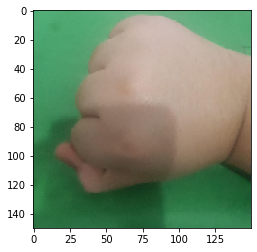

In [ ]:
#Model Rock

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving Harun_Paper.jpeg to Harun_Paper.jpeg
Harun_Paper.jpeg
paper


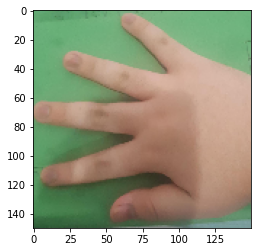

In [ ]:
#Model Paper

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving Harun_Scissors.jpeg to Harun_Scissors.jpeg
Harun_Scissors.jpeg
scissors


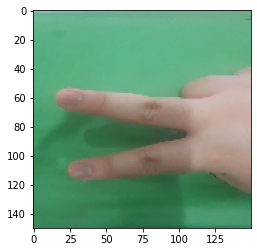

In [ ]:
#Model Scissors

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')